# 15. Матричное умножение
Вычисление элементов произведения $C$ двух квадратных матриц $A=(a_{ij})$ и $B=(b_{ij})$ по формулам
$$
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} \qquad (i=1,2,\dots,n;~ j=1,2,\dots,n)
$$
легко реализуется с помощью трех вложенных циклов: по $i$, по $j$ и по $k$.
Различные варианты алгоритма можно получить перестановкой циклов.
Напишите шесть функций `multijk`, `multikj`, `multjik`, ..., 
реализующих каждый из этих вариантов. Для серии случайно сгенерированных матриц больших размеров
замерьте время, требуемое этими функциями и стандартной операцией `@`.
Нарисуйте графики зависимости времени от порядка матриц.
Объясните, почему требуется различное время на выполнение каждой из написанных вами функций.






In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline

# 6 функций mult

In [ ]:
def multijk(A, B, C, n):
    start_time=datetime.datetime.now()
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [ ]:
def multikj(A, B, C, n):
    start_time=datetime.datetime.now()
    for i in range(0, n):
        for k in range(0, n):
            for j in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [ ]:
def multjik(A, B, C, n):
    start_time=datetime.datetime.now()
    for j in range(0, n):
        for i in range(0, n):
            for k in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [ ]:
def multjki(A, B, C, n):
    start_time=datetime.datetime.now()
    for j in range(0, n):
        for k in range(0, n):
            for i in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [ ]:
def multkij(A, B, C, n):
    start_time=datetime.datetime.now()
    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [ ]:
def multkji(A, B, C, n):
    start_time=datetime.datetime.now()
    for k in range(0, n):
        for j in range(0, n):
            for i in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

Массивы с полученными значениями

In [ ]:
ijk=np.array([],dtype=np.float)
ikj=np.array([],dtype=np.float)
jik=np.array([],dtype=np.float)
jki=np.array([],dtype=np.float)
kij=np.array([],dtype=np.float)
kji=np.array([],dtype=np.float)
std=np.array([],dtype=np.float)

# main

In [ ]:
random.seed()
for n in range (100, 301, 10):
    A=random.rand(n, n)
    B=random.rand(n, n)
    C=np.zeros((n, n))
    
    ijk=np.append(ijk, multijk(A, B, C, n))
    
    C=np.zeros((n, n))
    ikj=np.append(ikj, multikj(A, B, C, n))
    
    C=np.zeros((n, n))
    jik=np.append(jik, multjik(A, B, C, n))
    
    C=np.zeros((n, n))
    jki=np.append(jki, multjki(A, B, C, n))
    
    C=np.zeros((n, n))
    kij=np.append(kij, multkij(A, B, C, n))
    
    C=np.zeros((n, n))
    kji=np.append(kji, multkji(A, B, C, n))
    
    C=np.zeros((n, n))
    start_time=datetime.datetime.now()
    C=A@B
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    std=np.append(std, res)

# графики зависимости времени от порядка матриц

In [ ]:
plt.figure(figsize = (17, 13))
plt.grid()
x=np.linspace(100, 300, 21)
plt.semilogy(x, ijk, label='ijk')
plt.semilogy(x, ikj, label='ikj')
plt.semilogy(x, jik, label='jik')
plt.semilogy(x, jki, label='jki')
plt.semilogy(x, kij, label='kij')
plt.semilogy(x, kji, label='kji')
plt.semilogy(x, std, label='@')
plt.xlabel('Порядок матриц')
plt.ylabel('Время выполнения (с)')
plt.legend(loc='best', fontsize=14)
pass

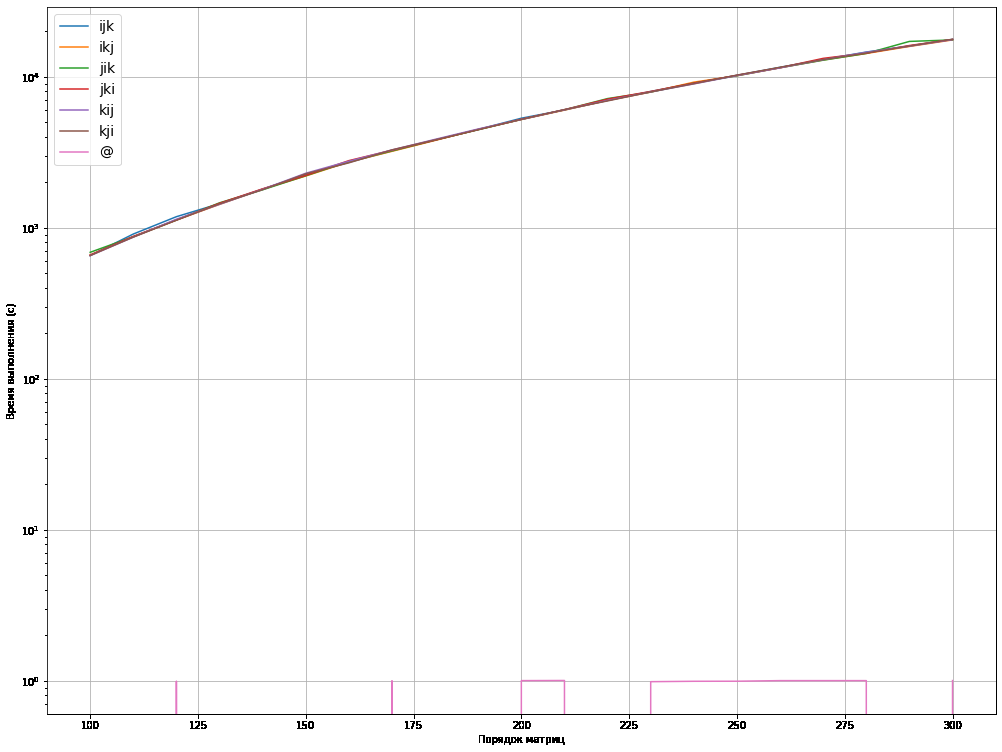

# Вывод
### Как видно по графику, разница во времени выполнения NumPy почти нивелируется, что нельзя сказать об операторе  @. Оператор @ делает все задачи последовательно, а NumPy разбивает операции на подзадачи, что позволяет делать их одновременно. Это и позволяет увеличить скорость выполнения